## Тема 8

### Задача A. Бинарное дерево (вставка, поиск, обход)

Напишите программу, которая будет реализовывать действия в бинарном дереве поиска «вставить» и «найти» (по значению). Программа должна обрабатывать запросы трёх видов:

ADD n — если указанного числа еще нет в дереве, вставлять его и выводить слово «DONE», если уже есть — оставлять дерево как было и выводить слово «ALREADY».

SEARCH — следует выводить слово «YES» (если значение найдено в дереве) или слово «NO» (если не найдено). Дерево при этом не меняется.

PRINTTREE — выводить все дерево, обязательно используя алгоритм, указанный в формате вывода результатов.

**Формат ввода**  
В каждой строке входных данных записан один из запросов ADD n или SEARCH n или PRINTTREE. Гарантируется, что запросы PRINTTREE будут вызываться только в моменты, когда дерево не пустое. Общее количество запросов не превышает 1000, из них не более 20 запросов PRINTTREE.

**Формат вывода**  
Для каждого запроса выводите ответ на него. Для запросов ADD и SEARCH — соответствующее слово в отдельной строке. На запрос PRINTTREE надо выводить дерево, обязательно согласно такому алгоритму:

1) Распечатать левое поддерево

2) Вывести количество точек, равное глубине узла

3) Вывести значение ключа

4) Распечатать правое поддерево

**Пример**  
**`Ввод`**  	
ADD 2  
ADD 3  
ADD 2  
SEARCH 2  
ADD 5  
PRINTTREE  
SEARCH 7  

**`Вывод`**  
DONE  
DONE  
ALREADY  
YES  
DONE  
2  
.3    
..5  
NO  

In [ ]:
def add(root, key):
    if not root:
        root.extend([key, None, None])
        print("DONE")
        return

    root_key = root[0]
    if key == root_key:
        print("ALREADY")
        return
    elif key < root_key:
        left_anc = root[1]
        if not left_anc:
            root[1] = [key, None, None]
            print("DONE")
        else:
            add(root[1], key)
    elif key > root_key:
        right_anc = root[2]
        if not right_anc:
            root[2] = [key, None, None]
            print("DONE")
        else:
            add(root[2], key)


def search(root, key):
    if not root:
        print("NO")
        return

    root_key = root[0]
    if key == root_key:
        print("YES")
        return
    elif key < root_key:
        left_anc = root[1]
        if not left_anc:
            print("NO")
        else:
            search(left_anc, key)
    elif key > root_key:
        right_anc = root[2]
        if not right_anc:
            print("NO")
        else:
            search(root[2], key)


def walk(root, depth=0):
    if not root:
        return

    if root[1]:
        walk(root[1], depth + 1)
    print(f"{''.join('.' * depth)}{root[0]}")
    if root[2]:
        walk(root[2], depth + 1)


file = open('input.txt')
commands = file.readlines()
file.close()

tree = []

for command in commands:
    command_parts = command.split()

    if command_parts[0] == 'ADD':
        add(tree, int(command_parts[1]))
    elif command_parts[0] == 'SEARCH':
        search(tree, int(command_parts[1]))
    elif command_parts[0] == 'PRINTTREE':
        walk(tree)

---

### Задача B. Родословная: предки и потомки

В генеалогическом древе у каждого человека, кроме родоначальника, есть ровно один родитель.

Каждом элементу дерева сопоставляется целое неотрицательное число, называемое высотой. У родоначальника высота равна 0, у любого другого элемента высота на 1 больше, чем у его родителя.

Даны два элемента в дереве. Определите, является ли один из них потомком другого.

**Формат ввода**  
Программа получает на вход число элементов в генеалогическом древе N. Далее следует N−1 строка, задающие родителя для каждого элемента древа, кроме родоначальника. Каждая строка имеет вид имя_потомка имя_родителя.

Далее до конца файла идут строки, содержащие имена двух элементов дерева.

**Формат вывода**  
Для каждого такого запроса выведите одно из трех чисел: 1, если первый элемент является предком второго, 2, если второй является предком первого или 0, если ни один из них не является предком другого.

**Пример**  
**`Ввод`**	
9  
Alexei Peter_I  
Anna Peter_I  
Elizabeth Peter_I  
Peter_II Alexei  
Peter_III Anna  
Paul_I Peter_III  
Alexander_I Paul_I  
Nicholaus_I Paul_I  
Anna Nicholaus_I  
Peter_II Peter_I  
Alexei Paul_I  

**`Вывод`**  
1 2 0 


In [ ]:
file = open('input.txt')
lines = file.readlines()
file.close()

n = int(lines[0])

rel_map = {}
for line in lines[1: n]:
    anc, pre = line.split()
    if pre not in rel_map:
        rel_map[pre] = [anc]
    else:
        rel_map[pre].append(anc)

def rel_exists(predecessor, ancestor):
    re_flag = []

    def rel_exists_recur(p, a, flag: []):
        if p not in rel_map:
            return

        anc_list = rel_map[p]
        if a in anc_list:
            flag.append(True)
            return

        for aa in anc_list:
            if not flag:
                rel_exists_recur(aa, a, flag)

    rel_exists_recur(predecessor, ancestor, re_flag)
    return bool(re_flag)


request_results = []

for request in lines[n:]:
    first, second = request.split()
    if rel_exists(first, second):
        request_results.append('1')
    elif rel_exists(second, first):
        request_results.append('2')
    else:
        request_results.append('0')


print(' '.join(request_results))



---

### Задача C. Родословная: LCA

В генеалогическом древе определите для двух элементов их наименьшего общего предка. Наименьшим общим предком элементов A и B является такой элемент C, что С является предком A, C является предком B, при этом глубина C является наибольшей из возможных. При этом элемент считается своим собственным предком.

**Формат ввода**  
Формат входных данных аналогичен предыдущей задаче.

**Формат вывода**  
Для каждого запроса выведите наименьшего общего предка данных элементов.

**Пример**  
**`Ввод`**	
9  
Alexei Peter_I  
Anna Peter_I  
Elizabeth Peter_I  
Peter_II Alexei  
Peter_III Anna  
Paul_I Peter_III  
Alexander_I Paul_I  
Nicholaus_I Paul_I  
Alexander_I Nicholaus_I  
Peter_II Paul_I  
Alexander_I Anna  

**`Вывод`**  
Paul_I  
Peter_I  
Anna  

In [ ]:
import sys
sys.setrecursionlimit(1200)

file = open('input.txt')
lines = file.readlines()
file.close()

n = int(lines[0])

rel_tree_index = {}
rel_map = {}
anc_set = set()
all_set = set()


for line in lines[1: n]:
    anc, pre = line.split()
    anc_set.add(anc)
    all_set.add(anc)
    all_set.add(pre)

    if pre not in rel_map:
        rel_map[pre] = [anc]
    else:
        rel_map[pre].append(anc)

root = list(all_set.difference(anc_set))[0]


def fill_tree(tree_list, root_key, relations_map, predecessor=None, depth=0):
    global rel_tree_index
    node = [root_key, [], predecessor, depth]
    tree_list.append(node)

    rel_tree_index[root_key] = node

    if root_key not in relations_map:
        return

    for rel in relations_map[root_key]:
        fill_tree(node[1], rel, relations_map, node, depth + 1)


tree = []
fill_tree(tree, root, rel_map)
tree = tree[0]


def search(key_to_find):
    if key_to_find not in rel_tree_index:
        return None
    return rel_tree_index[key_to_find]


def lca(person_a, person_b) -> str:
    node_a = search(person_a)
    node_b = search(person_b)

    if node_a[3] == 0:
        return node_a[0]
    if node_b[3] == 0:
        return node_b[0]

    depth_div = node_a[3] - node_b[3]
    if depth_div > 0:
        for i in range(depth_div):
            node_a = node_a[2]
    elif depth_div < 0:
        for i in range(-depth_div):
            node_b = node_b[2]

    while node_a[0] != node_b[0]:
        node_a = node_a[2]
        node_b = node_b[2]

    return node_a[0]



for request in lines[n:]:
    first_person, second_person = request.split()
    print(lca(first_person, second_person))
    

---

### D. Бусинки

Маленький мальчик делает бусы. У него есть много пронумерованных бусинок. Каждая бусинка имеет уникальный номер – целое число в диапазоне от 1 до N. Он выкладывает все бусинки на полу и соединяет бусинки между собой произвольным образом так, что замкнутых фигур не образуется. Каждая из бусинок при этом оказывается соединенной с какой-либо другой бусинкой.

Требуется определить, какое максимальное количество последовательно соединенных бусинок присутствует в полученной фигуре.

**Формат ввода**  
В первой строке – количество бусинок 1 ≤ N ≤ 2500.  
В последующих N-1 строках по два целых числа – номера, соединенных бусинок.

**Формат вывода**  
Вывести одно число – искомое количество бусинок.

**Пример 1**  
**`Ввод`**	
2  
1 2  

**`Вывод`**  
2  

**Пример 2**  
**`Ввод`**	
5  
2 1  
2 3  
2 4  
2 5  

**`Вывод`**  
3

In [ ]:

file = open('input.txt')
lines = file.readlines()
file.close()

n = int(lines[0])
rel_map = {}

for i in range(1, n):
    parent, child = map(int, lines[i].split())

    if parent not in rel_map:
        rel_map[parent] = [child]
    else:
        rel_map[parent].append(child)
    if child not in rel_map:
        rel_map[child] = [parent]
    else:
        rel_map[child].append(parent)


def get_leaves():
    leaves_list = []
    for node in rel_map:
        if len(rel_map[node]) == 1:
            leaves_list.append(node)
    return leaves_list


def find_diameter():
    global rel_map
    dist = 0

    while len(rel_map) >= 2:
        leaves = get_leaves()
        for leaf in leaves:
            for leaf_child in rel_map[leaf]:
                rel_map[leaf_child].remove(leaf)
            rel_map.pop(leaf)
        if len(leaves) < 2:
            dist += 1
        else:
            dist += 2

    dist += len(rel_map)

    print(dist)


find_diameter()


---

### E. Дерево Хаффмана

Алгоритм Хаффмана позволяет кодировать символы алфавита беспрефиксным кодом различной длины, сопоставляя частым символам более короткий код, а редким - более длинный. Этот алгоритм используется во многих программах сжатия данных. Код символа определяется по следующим правилам:

1. Символы входного алфавита образуют список свободных узлов. Каждый лист имеет вес, который может быть равен либо вероятности, либо количеству вхождений символа в сжимаемое сообщение.

2. Выбираются два свободных узла дерева с наименьшими весами.

3. Создается их родитель с весом, равным их суммарному весу.

4. Родитель добавляется в список свободных узлов, а два его потомка удаляются из этого списка.

5. Правой дуге, выходящей из родителя, ставится в соответствие бит 1, левой - бит 0. Битовые значения ветвей, исходящих от корня, не зависят от весов потомков.

6. Шаги, начиная со второго, повторяются до тех пор, пока в списке свободных узлов не останется только один свободный узел. Он и будет считаться корнем дерева.

Пусть буквы "а" встречается в сообщении 4 раза, буква "б" - 3 раза, а буквы "в" и "г" - по 1 разу. Этим частотам может быть сопоставлено такое дерево:

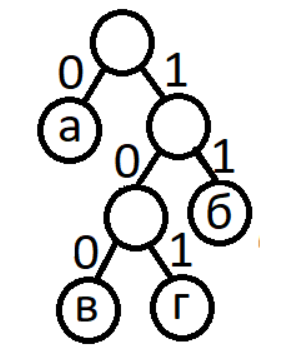

Двоичный код буквы - это все цифры на пути из корня дерева в лист, соответствующей этой букве.

Для эффективного сжатия также важно максимально экономно хранить дерево Хаффмана. Опишем обход в глубину этого дерева, при этом мы будем сначала полностью обходить левое поддерево, затем возвращаться в узел, а затем обходить правое поддерево. Каждый раз проходя по ребру будем записывать букву L, R или U в зависимости от того, куда мы шли по ребру (L - в левого ребенка, R- в правого ребенка, U - в родителя). Приведенному в примере дереву будет соответствовать строка:

LURLLURUURUU

Такая строка позволяет однозначно восстановить дерево и сопоставить двоичные коды всем листьям дерева. Однако, запись можно модифицировать, заменив ребра типа L и R на ребра типа D, которое означает, что мы спускаемся в ребенка (сначала в левого, а если левый посещен - в правого). Тогда запись для нашего дерева будет выглядеть так:

DUDDDUDUUDUU

По этой строке также однозначно возможно восстановить структуру дерева. Она использует алфавит только из двух символов вместо трёх и может быть закодирована меньшим числом бит.

Эту запись также можно модифицировать, заменив смысл команды U. Теперь U будет обозначать, что мы поднимаемся к предку текущей вершины до тех пор, пока мы правый ребёнок. Если при подъёме мы пришли в вершину из левого ребенка, то сразу перейдем в правого. Запись для нашего дерева будет выглядеть так:

DUDDUU

Вам необходимо по записи, построенной по таким правилам, определить коды для всех листьев в порядке их обхода.

**Формат ввода**  
В первой строке входного файла задается число N (1 ≤ N ≤ 100) - количество строк. Каждая из следующих N строк содержит описание обхода дерева.

Суммарное количество символов в описаниях не превосходит 100000.

**Формат вывода**  
В качестве ответа необходимо вывести N блоков кодов для каждой из строк входного файла. Каждый блок состоит из числа листьев K в этом дереве и из K строк, содержащих цифры 0 и 1 и описывающих код каждого из листьев.

Гарантируется, что размер вывода не превосходит 2Мб.

**Пример**  
**`Ввод`**	
2  
DUDDUU  
DU  

**`Вывод`**  
4  
0  
100  
101  
11  
2  
0  
1  

In [ ]:
file = open('input.txt')
lines = file.readlines()
file.close()

def walk(tree_root, res, path=""):
    if tree_root[0]:
        walk(tree_root[0], res, f"{path}{0}")
    if not tree_root[0] and not tree_root[1]:
        res.append(f"{path}\n")
    if tree_root[1]:
        walk(tree_root[1], res, f"{path}{1}")

outfile = open('output.txt', 'w')

for input_line in lines[1:]:
    commands = [char for char in input_line]

    tree = [[[], [], None, 0]]
    root = tree[0]
    current = root

    for command in commands:
        if command == 'D':
            new_elem = [[], [], current, -1]
            current[0] = new_elem
            current = new_elem
        elif command == 'U':
            while current[3] == 1:
                current = current[2]
            current = current[2]
            new_elem = [[], [], current, 1]
            current[1] = new_elem
            current = new_elem

    tree = tree[0]

    results = []
    walk(tree, results)
    outfile.write(f"{len(results)}\n")
    outfile.writelines(results)

outfile.close()


---